![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Lecture 3 Supporting Notebook

### Table of Contents
<p>
<div class="lev1">
    <a href="#Gradient-Descent">
        <span class="toc-item-num">1.&nbsp;&nbsp;</span>
        Gradient Descent
    </a>
</div>
<div class="lev1">
    <a href="#MC-Approximator">
        <span class="toc-item-num">2.&nbsp;&nbsp;</span>
        MC Approximator
    </a>
</div>
<div class="lev1">
    <a href="#Multiple-Tiles-for-Multiple-Features">
        <span class="toc-item-num">2.&nbsp;&nbsp;</span>
        Multiple Tiles for Multiple Features
    </a>
</div>
<div class="lev1">
    <a href="#TD(0)-Approximator"><span class="toc-item-num">4.&nbsp;&nbsp;</span>
        TD(0) Approximator
    </a>
</div>

ref. https://github.com/jcassiojr/Reinforcement-Learning-In-Motion/tree/master/Unit-8-The-Mountaincar

This note book is based on the lectures from Phil tabor. Yopu can find his complete video course on O'reilly website. 

# Gradient Descent

In [1]:
# Uncomment and run the command below the first time you start your instance
! pip install gym

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 1.6 MB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 38.9 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.3-py3-none-any.whl size=1657517 sha256=1c23e2ac90453666df2f54e79c3f5a2d6a1bd95a25b266f83651ba37558d0679
  Stored in directory: /home/ec2-user/.cache/pip/wheels/1f/63/7a/4368e4c3aedd396d4ab8e9b7922af06433994ebe739853ae4a
Successfully built gym
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tens

In [2]:
import sys
if "../" not in sys.path:
    sys.path.append("../")
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
next_x = 6  # We start the search at x=6
gamma = 0.01  # Step size multiplier
precision = 0.00001  # Desired precision of result
max_iters = 10000  # Maximum number of iterations

# Derivative function
def df(x):
    return 4 * x ** 3 - 9 * x ** 2


for _i in range(max_iters):
    current_x = next_x
    next_x = current_x - gamma * df(current_x)

    step = next_x - current_x
    print("Step: {}, difference: {}".format(_i, step))
    if abs(step) <= precision:
        break

print("Minimum at ", next_x)

# The output for the above will be something like
# "Minimum at 2.2499646074278457"

Step: 0, difference: -5.4
Step: 1, difference: 0.023760000000000003
Step: 2, difference: 0.025309273140264987
Step: 3, difference: 0.026978303236479206
Step: 4, difference: 0.028774389122137145
Step: 5, difference: 0.030704171104943834
Step: 6, difference: 0.03277313550751959
Step: 7, difference: 0.03498495575728611
Step: 8, difference: 0.03734063397888843
Step: 9, difference: 0.03983740658234747
Step: 10, difference: 0.04246738230109215
Step: 11, difference: 0.04521589529960479
Step: 12, difference: 0.04805958449122871
Step: 13, difference: 0.05096425942090499
Step: 14, difference: 0.05388268959034348
Step: 15, difference: 0.05675256261424311
Step: 16, difference: 0.0594949956770483
Step: 17, difference: 0.06201414040877884
Step: 18, difference: 0.06419855881437808
Step: 19, difference: 0.06592510511101723
Step: 20, difference: 0.0670659367382691
Step: 21, difference: 0.06749890133771519
Step: 22, difference: 0.06712084685040987
Step: 23, difference: 0.06586242786245022
Step: 24, diff

<div class="lev1">
    <a href="#Lecture-3-Supporting-Notebook"><span class="toc-item-num"></span>
        TOP
    </a>

![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# MC Approximator

## Linear Approximator
### The Mountain Car Problem
<img src="../images/RL-lecture3-1.png" alt="Drawing" style="width: 300px;">
The Mountain Car is a classic reinforcement learning problem where the objective is to create an algorithm which learns to climb a steep hill to reach the goal marked by a flag. The car’s engine is not powerful enough to drive up the hill without a head start so the car must drive up the left hill to obtain enough momentum to scale the steeper hill to the right and reach the goal.<br/>

+ When the problem begins the car is dropped into the valley and given an initial position and velocity as a vector. **This is the car’s state**.
<img src="../images/RL-lecture3-2.png" alt="Drawing" style="width: 300px;">
+ The agent must tell the car to take one of three actions: 
<img src="../images/RL-lecture3-3.png" alt="Drawing" style="width: 200px;">
+ This action is sent to the Mountain Car environment algorithm which returns a new state (position and velocity) as well as a reward. 
+ For each step that the car does not reach the goal, located at position 0.5, the environment returns a **reward** of -1. 
+ Each episode finishes if the car reach the goal or accumulate a sum of -200 negative rewards.
+ We will use these rewards in our MC approximation algorithm to solve the Mountain Car problem.

In [4]:
env = gym.make('MountainCar-v0') 

### Exploring the Environment

In [5]:
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)

State space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space:  Discrete(3)


This tells us that the state space represents a 2-dimensional box, so each state observation is a vector of 2 (float) values, and that the action space comprises three discrete actions.

By default, the three actions are represented by the integers 0, 1 and 2. However, we don’t know what values the elements of the state vector can take. This can be found using:

In [6]:
print("min car position and velocity: ", env.observation_space.low)
print("max car position and velocity: ", env.observation_space.high)

min car position and velocity:  [-1.2  -0.07]
max car position and velocity:  [0.6  0.07]


From this, we can see that the first element of the state vector (representing the cart’s position) can take on any value in the range -1.2 to 0.6, while the second element (representing the cart’s velocity) can take on any value in the range -0.07 to 0.07.

The class Model encapsulate the function that update the weights:

$w_{t+1}=w_t+\frac{\alpha}{t}(G - \hat V)$ 

In [7]:
class Model(object):
    def __init__(self, alpha, stateSpace):
        self.ALPHA = alpha
        self.weights = {}
        self.stateSpace = stateSpace
        for state in stateSpace:
            self.weights[state] = 0
    # return the component weight for that particular state
    def calculateV(self, state):
        v = self.weights[state]
        return v
    # MC update
    # to decrease alpha value we are multiplining in this case for 1/t
    # to update the weights we pass the agent's estimate of the value function, G and the state
    # The value of that state is just the weight, since we are using state aggregation
    # increment the weights by alpha times G minus value
    def updateWeights(self, G, state, t):
        value = self.calculateV(state)
        self.weights[state] += self.ALPHA/t*(G - value)

In [8]:
# Just put continuous values into bins to have discrete values
# the weight has one component for each bucket and the value of the state is that component
# the gradient of the value function approx is one for the groups component and zero for the others
# returns in which bin are pos and vel (state)
def aggregateState(posBins, velBins, obs):
    pos = int(np.digitize(obs[0], posBins))
    vel = int(np.digitize(obs[1], velBins))
    state = (pos, vel)
    return state

In [9]:
# apply the policy, depending on the velocity signal (bin 4 is the threshold between positive and negative)
# keep increasing the direction of movement 
# receives the velocity. If the velocity is positive, the agent pushes to the right and vice-versa
def policy(vel):
    #_, velocity = state
    # 0 - backward, 1 - none, 2 - forward
    if vel < 4: 
        return 0
    elif vel >= 4: 
        return 2

For alpha: 0.1
episode: 0
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 11000
episode: 12000
episode: 13000
episode: 14000
episode: 15000
episode: 16000
episode: 17000
episode: 18000
episode: 19000
For alpha: 0.01
episode: 0
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 11000
episode: 12000
episode: 13000
episode: 14000
episode: 15000
episode: 16000
episode: 17000
episode: 18000
episode: 19000
For alpha: 0.001
episode: 0
episode: 1000
episode: 2000
episode: 3000
episode: 4000
episode: 5000
episode: 6000
episode: 7000
episode: 8000
episode: 9000
episode: 10000
episode: 11000
episode: 12000
episode: 13000
episode: 14000
episode: 15000
episode: 16000
episode: 17000
episode: 18000
episode: 19000


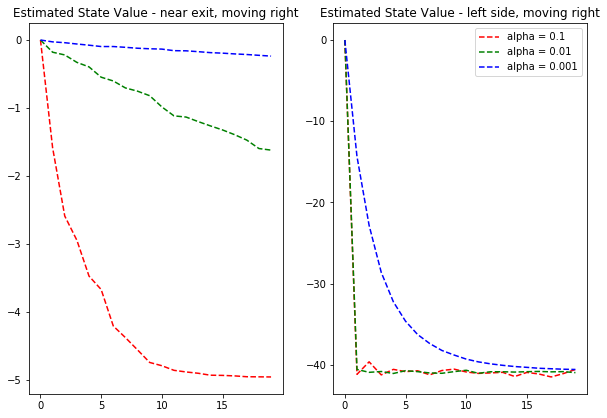

CPU times: user 13min 19s, sys: 2.92 s, total: 13min 22s
Wall time: 13min 14s


In [10]:
%%time
if __name__ == '__main__':
    # set the gamma
    GAMMA = 1.0
    # make the environment
    env = gym.make('MountainCar-v0') 
    # set up the bins, breaking pos and vel in 8 separated bins for each
    posBins = np.linspace(-1.2, 0.5, 8)
    velBins = np.linspace(-0.07, 0.07, 8)
    
    # list of tuples with possible combinations of buckets for an observation
    stateSpace = []
    for i in range(1,9):
        for j in range(1,9):
            stateSpace.append((i,j))
    # number of games
    numEpisodes = 20000
    # keep track of the value function estimates at the near exit point at the left side of the track
    # to plot this we use a list of x values, wchich is just zero to the number of games divided by 1000 - 1
    # the dimention of 3 will help plot for three different alpha value 
    nearExit = np.zeros((3, int(numEpisodes/1000)))
    leftSide = np.zeros((3, int(numEpisodes/1000)))
    x = [i for i in range(nearExit.shape[1])]
    # loop through 3 learning rates
    # hyperparametar tunning: part of the art of Rl!!!
    for k, LR in enumerate([0.1, 0.01, 0.001]):
        print("For alpha: {}".format(LR))
        dt = 1.0
        # initialize a new model for each learning rate
        model = Model(LR, stateSpace)        
        for i in range(numEpisodes):
            
            # update the nearExit and leftSide arrays each 1000 games
            if i % 1000 == 0:
                
                print("episode: {}".format(i))
                #print("episode memory: {}".format(memory))
                #print("statesReturns: {}".format(statesReturns))
                
                idx = i // 1000
                #print('posBins', posBins)
                #print('velBins', velBins)
                state = aggregateState(posBins, velBins, (0.43, 0.054))
                #print("state near exit: {}".format(state))
                nearExit[k][idx] = model.calculateV(state)
                #print("nearExit[k][idx]: {}".format(nearExit[k][idx]))
                state = aggregateState(posBins, velBins, (-1.1, 0.001))
                #print("state left: {}".format(state))
                leftSide[k][idx] = model.calculateV(state) 
                #print("leftSide[k][idx]: {}".format(leftSide[k][idx]))
                # increment the divisor of the learning rate
                # just a small 0.1 increment every 1000 games gives us a fair convergence
                dt += 0.1
            # reset the environment, done flag and memory at the top of each episode
            observation = env.reset()
            done = False
            # memory of the rewards to the terminal State
            memory = [] 
            # play the episode according to the policy
            # append a terminal state at the end of the episode
            while not done:
                state = aggregateState(posBins, velBins, observation)
                action = policy(state[1])
                observation_, reward, done, _ = env.step(action)           
                memory.append((state, action, reward))
                #print("memory: {}".format(memory))
                observation = observation_ 
            state = aggregateState(posBins, velBins, observation)
            memory.append((state, action, reward))
            
            # do the calculations of the returns at each time step by iterating backwards
            # over the memory, skipping the terminal state
            G = 0
            last = True
            statesReturns = [] 
            # use the memory vector to calulate the return function (sum of rewards from initial state to the end)
            for state, action, reward in reversed(memory):
                if last:
                    last = False
                else:
                    statesReturns.append((state, G))
                G = GAMMA*G + reward
            # reverse this list of states and return to put it into the chronological order, and
            # keep track of the returns that follow the agent's first visit to that state
            statesReturns.reverse()
            statesVisited = []
            for state, G in statesReturns:  
                # updates the model weights if it is the firt visit to that state
                if state not in statesVisited:
                    model.updateWeights(G, state, dt)
                    statesVisited.append(state)
    # when we reach the finish of the game, plotthe nearExit and leftSide arrays for each leraning rate
    plt.figure(figsize=(10, 15))
    plt.subplot(221)
    plt.plot(x, nearExit[0], 'r--')
    plt.plot(x, nearExit[1], 'g--')
    plt.plot(x, nearExit[2], 'b--')
    plt.title('Estimated State Value - near exit, moving right')
    plt.subplot(222)    
    plt.plot(x, leftSide[0], 'r--')
    plt.plot(x, leftSide[1], 'g--')
    plt.plot(x, leftSide[2], 'b--')
    plt.title('Estimated State Value - left side, moving right')
    plt.legend(('alpha = 0.1', 'alpha = 0.01', 'alpha = 0.001'))
    plt.show()

### Conclusions
#### State nearest to the exit and moving right
The alpha of 0.001 produces the most reasonable estimate.
It is between -1 and -2 and the true values is two moves to the exit.
The other two alphas both converge on the wrong answers on either side of it.
### State in Left side , moving right
All three alphas values converges to the answer -40, which is actually really close to the value of 39 steps required to reach the exit, starting from the left side of the small positive velocity.
Note the difference in the slope between the three different values of alpha:
For 0.1 and 0.01 converge almost instantly to the correct answer, while alpha 0.001 takes logner to get there.
## This highlights the importance of hyper parametar tunning in RL!!!
#### Rule of thumb
Start with some value and run up and down by 1 order of magnitude (in powers of 10) 

<div class="lev1">
    <a href="#Lecture-3-Supporting-Notebook"><span class="toc-item-num"></span>
        TOP
    </a>

![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Multiple Tiles for Multiple Features

In [10]:
np.linspace(-1.2, 0.5, 8)

array([-1.2       , -0.95714286, -0.71428571, -0.47142857, -0.22857143,
        0.01428571,  0.25714286,  0.5       ])

In [11]:
def create_tiling(feat_range, bins, offset):
    """
    Create 1 tiling spec of 1 dimension(feature)
    feat_range: feature range; example: [-1, 1]
    bins: number of bins for that feature; example: 10
    offset: offset for that feature; example: 0.2
    """
    
    return np.linspace(feat_range[0], feat_range[1], bins+1)[1:-1] + offset

def create_tilings(feature_ranges, number_tilings, bins, offsets):
        """
        feature_ranges: range of each feature; example: x: [-1, 1], y: [2, 5] -> [[-1, 1], [2, 5]]
        number_tilings: number of tilings; example: 3 tilings
        bins: bin size for each tiling and dimension; example: [[10, 10], [10, 10], [10, 10]]: 3 tilings * [x_bin, y_bin]
        offsets: offset for each tiling and dimension; example: [[0, 0], [0.2, 1], [0.4, 1.5]]: 3 tilings * [x_offset, y_offset]
        """
        tilings = []
        # for each tiling
        for tile_i in range(number_tilings):
            tiling_bin = bins[tile_i]
            tiling_offset = offsets[tile_i]

            tiling = []
            # for each feature dimension
            for feat_i in range(len(feature_ranges)):
                feat_range = feature_ranges[feat_i]
                # tiling for 1 feature
                feat_tiling = create_tiling(feat_range, tiling_bin[feat_i], tiling_offset[feat_i])
                tiling.append(feat_tiling)
            tilings.append(tiling)
        return np.array(tilings)
    
feature_ranges = [[-1, 1], [2, 5]]  # 2 features
number_tilings = 3
bins = [[10, 10], [10, 10], [10, 10]]  # each tiling has a 10*10 grid
offsets = [[0, 0], [0.2, 1], [0.4, 1.5]]
#feature_range=[[-1.2, 0.6],[-0.07, 0.07]]
#number_tilings= 8
#bins= [[8,8],[8,8],[8,8],[8,8],[8,8],[8,8],[8,8],[8,8]]
#offsets= [[0,0],[0.5,1.5],[1.,3.],[1.5,4.5],[2.,6.],[2.5,7.5],[3.,9.],[3.5,10.5]]

tilings = create_tilings(feature_ranges, number_tilings, bins, offsets)
print(tilings[0], tilings[1], tilings[2])
print(tilings.shape)  # # of tilings X features X bins

# (3, 2, 9)

[[-0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]
 [ 2.3  2.6  2.9  3.2  3.5  3.8  4.1  4.4  4.7]] [[-6.00000000e-01 -4.00000000e-01 -2.00000000e-01  5.55111512e-17
   2.00000000e-01  4.00000000e-01  6.00000000e-01  8.00000000e-01
   1.00000000e+00]
 [ 3.30000000e+00  3.60000000e+00  3.90000000e+00  4.20000000e+00
   4.50000000e+00  4.80000000e+00  5.10000000e+00  5.40000000e+00
   5.70000000e+00]] [[-4.00000000e-01 -2.00000000e-01  1.11022302e-16  2.00000000e-01
   4.00000000e-01  6.00000000e-01  8.00000000e-01  1.00000000e+00
   1.20000000e+00]
 [ 3.80000000e+00  4.10000000e+00  4.40000000e+00  4.70000000e+00
   5.00000000e+00  5.30000000e+00  5.60000000e+00  5.90000000e+00
   6.20000000e+00]]
(3, 2, 9)


In [12]:
def get_tile_coding(feature, tilings):
        """
        feature: sample feature with multiple dimensions that need to be encoded; example: [0.1, 2.5], [-0.3, 2.0]
        tilings: tilings with a few layers
        return: the encoding for the feature on each layer
        """
        num_dims = len(feature)
        feat_codings = []
        for tiling in tilings:
            feat_coding = []
            for i in range(num_dims):
                feat_i = feature[i]
                tiling_i = tiling[i]  # tiling on that dimension
                coding_i = np.digitize(feat_i, tiling_i)
                feat_coding.append(coding_i)
            feat_codings.append(feat_coding)
        return np.array(feat_codings)
        
feature = [0.1, 4.0]

coding = get_tile_coding(feature, tilings)
coding

array([[5, 6],
       [4, 3],
       [3, 1]])

<div class="lev1">
    <a href="#Lecture-3-Supporting-Notebook"><span class="toc-item-num"></span>
        TOP
    </a>

![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# TD(0) Approximator

In [15]:
# pass the number of layers and bins
def getBins(nBins=8, nLayers=8):
    # construct the asymmetric bins
    posTileWidth = (0.5 + 1.2)/nBins*0.5
    velTileWidth = (0.07 + 0.07)/nBins*0.5
    posBins = np.zeros((nLayers,nBins))
    velBins = np.zeros((nLayers,nBins))
    for i in range(nLayers):
        posBins[i] = np.linspace(-1.2+i*posTileWidth, 0.5+i*posTileWidth/2, nBins)
        velBins[i] = np.linspace(-0.07+3*i*velTileWidth, 0.07+3*i*posTileWidth/2, nBins)    
    return posBins, velBins    

In [16]:
# pass the number of layers and bins
def tileState(posBins, velBins,  obs, nTiles=8, nLayers=8):
    position, velocity = obs
    # 8 tilings of 8x8 grid   
    tiledState = np.zeros(nTiles*nTiles*nTiles)
    for row in range(nLayers):
        if position > posBins[row][0] and position < posBins[row][nTiles-1]:
            if velocity > velBins[row][0] and velocity < velBins[row][nTiles-1]:
                x = np.digitize(position, posBins[row])
                y = np.digitize(velocity, velBins[row])                
                idx = (x+1)*(y+1)+row*nTiles**2-1
                tiledState[idx] = 1.0
            else:
                break
        else:
            break            
    return tiledState

In [18]:
class Model(object):
    # get this inputs and initialize a empty array of weights with the size of 
    # the number of states
    def __init__(self, alpha, gamma, nStates):
        self.ALPHA = alpha
        self.GAMMA = gamma
        self.weights = np.zeros(nStates)
    # the value of a particular state is a vector dot product of weigths
    # in the binary representation of the states
    def calculateV(self, state):     
        v = self.weights.dot(state)
        return v
    # to update the weights, we need the value of the current state at time t
    # and the state at time t+1
    # we update the weights according to the update rule.
    # the parameter t that dictates how much I decrease alpha ovet time.
    # It starts one and increases as we play more games.
    # Note that this is multiplying our array of weights by a binary representation of 
    # of the state, so we only update the weights for the state we are interested in
    def updateWeights(self, R, state, state_, t):        
        value = self.calculateV(state) 
        value_ = self.calculateV(state_)
        self.weights += self.ALPHA/t*(R + self.GAMMA*value_ - value)*state

In [19]:
# this simple policy just takes the velocity as input.
# It pushes in the direction of the movement
def policy(velocity):
    # 0 - backward, 1 - none, 2 - forward
    if velocity < 0:
        return 0
    elif velocity >= 0:
        return 2

alpha 0.1 start episode 0
alpha 0.1 start episode 1000
alpha 0.1 start episode 2000
alpha 0.1 start episode 3000
alpha 0.1 start episode 4000
alpha 0.1 start episode 5000
alpha 0.1 start episode 6000
alpha 0.1 start episode 7000
alpha 0.1 start episode 8000
alpha 0.1 start episode 9000
alpha 0.1 start episode 10000
alpha 0.1 start episode 11000
alpha 0.1 start episode 12000
alpha 0.1 start episode 13000
alpha 0.1 start episode 14000
alpha 0.1 start episode 15000
alpha 0.1 start episode 16000
alpha 0.1 start episode 17000
alpha 0.1 start episode 18000
alpha 0.1 start episode 19000
alpha 0.01 start episode 0
alpha 0.01 start episode 1000
alpha 0.01 start episode 2000
alpha 0.01 start episode 3000
alpha 0.01 start episode 4000
alpha 0.01 start episode 5000
alpha 0.01 start episode 6000
alpha 0.01 start episode 7000
alpha 0.01 start episode 8000
alpha 0.01 start episode 9000
alpha 0.01 start episode 10000
alpha 0.01 start episode 11000
alpha 0.01 start episode 12000
alpha 0.01 start episod

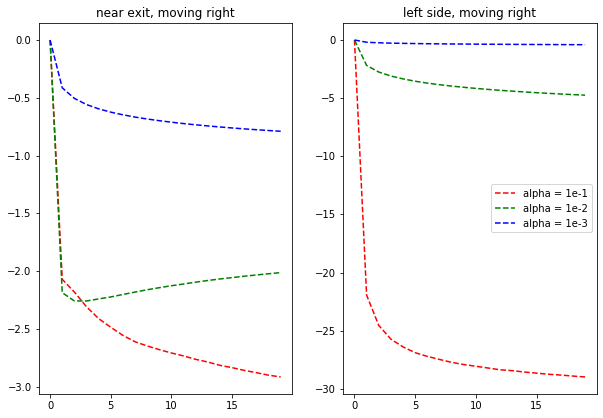

CPU times: user 29min 2s, sys: 4.64 s, total: 29min 6s
Wall time: 29min


In [31]:
%%time
if __name__ == '__main__':
    # set gamma to 1.0, make the environment
    GAMMA = 1.0
    env = gym.make('MountainCar-v0')
    # generate the bins, set the number of episodes
    posBins, velBins = getBins()
    numEpisodes = 20000
    # initialize the arrays to keep track of the updates to the value function
    # for our states of interest.
    nearExit = np.zeros((3, int(numEpisodes/1000)))
    leftSide = np.zeros((3, int(numEpisodes/1000)))
    x = [i for i in range(nearExit.shape[1])]
    # iterate over an enumerated list of learning rates
    for k, ALPHA in enumerate([1e-1, 1e-2, 1e-3]):
        # for each learning rate, initialize a new model with 8 cube states.
        model = Model(ALPHA, GAMMA, 8*8*8)
        # The dt is used to decrease the learning rate over time
        # so it gets reset for each learning rate
        dt = 1.0
        # every 1000 games calculate the value of the nearExit and leftSide states,
        # and printout a placeholder to the terminal
        for i in range(numEpisodes):
            sys.stdout.flush()
            if i % 1000 == 0:
                print('alpha', ALPHA, 'start episode', i)
                idx = i // 1000
                tiledState = tileState(posBins, velBins, (0.43, 0.054))
                nearExit[k][idx] = model.calculateV(tiledState)        
                tiledState = tileState(posBins, velBins, (-1.1, 0.001))
                leftSide[k][idx] = model.calculateV(tiledState)
            # increment dt by 10, so alpha gradually decreases over time
            if i % 100 == 0:
                dt += 10
            # at the top of each episode, reset the environment and done flag
            observation = env.reset()
            done = False 
            # play the game according to the policy and call the
            # update model function at each time step
            while not done:
                state = tileState(posBins, velBins, observation)
                #print("state", state)
                action = policy(observation[1])
                observation_, reward, done, _ = env.step(action)
                #print("reward", reward)
                #total_reward.append(reward) #CASS
                state_ = tileState(posBins, velBins, observation_)
                #print("state_", state_)
                model.updateWeights(reward, state, state_, dt)
                observation = observation_ 
    
    # when finished, make two subplots the two state of interest side by side
    plt.figure(figsize=(10, 15))
    plt.subplot(221)
    plt.plot(x, nearExit[0], 'r--')
    plt.plot(x, nearExit[1], 'g--')
    plt.plot(x, nearExit[2], 'b--')
    plt.title('near exit, moving right')
    plt.subplot(222)    
    plt.plot(x, leftSide[0], 'r--')
    plt.plot(x, leftSide[1], 'g--')
    plt.plot(x, leftSide[2], 'b--')
    plt.title('left side, moving right')
    plt.legend(('alpha = 1e-1', 'alpha = 1e-2', 'alpha = 1e-3'))
    plt.show()    

### Conclusions
+ For the near exit moving right, we should get something close to -2.
+ For the left side moving right, we should get aroung -39.

#### State nearest to the exit and moving right
The alpha of 0.001 produces the pretty bad estimates.
It produces the non-physical result of approximately zero for the left side car. We shouldn't use that value.
The alpha of 0.01 starts to move in the right direction. for the near-exit state, it actually starts to approach the true value of -2, but for the left side it seems to have stabilized at a value of about -5, which is again non-physical.
The best seems to be alpha 0.1, that has an estimate of approximately -0.3 for the near exit and about -29 for the left side.

#### Why so different from the Monte Carlo approximation?
This is because the DT methods don't converge to the global minima. 

They find some other local minima nearby.

![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)